In [1]:
import random

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import psycopg2

In [5]:
from tqdm.notebook import tqdm

# Data preparation

In [6]:
tmp = '''Адыгея		Майкоп	7 792	449 171
Алтай		Горно-Алтайск	92 903	213 703
Алтайский	край	Барнаул	167 996	2 384 812
Амурская	область	Благовещенск	361 913	809 873
Архангельская	область	Архангельск	589 913	1 183 323
Астраханская	область	Астрахань	49 024	1 021 287
Башкортостан	республика	Уфа	142 947	4 071 987
Белгородская	область	Белгород	27 134	1 547 936
Брянская	область	Брянск	34 857	1 232 940
Бурятия		Улан-Удэ	351 334	978 495
Владимирская	область	Владимир	29 084	1 405 613
Волгоградская	область	Волгоград	112 877	2 557 397
Вологодская	область	Вологда	144 527	1 191 010
Воронежская	область	Воронеж	52 216	2 331 147
Дагестан		Махачкала	50 270	2 990 371
Еврейская	автономная область	Биробиджан	36 266	168 368
Забайкальский	край	Чита	431 892	1 087 452
Ивановская	область	Иваново	21 437	1 036 909
Ингушетия		Магас	3 628	463 893
Иркутская	область	Иркутск	774 846	2 414 913
Кабардино-Балкарская	республика	Нальчик	12 470	860 709
Калининградская	область	Калининград	15 125	968 944
Республика Калмыкия		Элиста	74 731	280 564
Калужская	область	Калуга	29 777	1 010 486
Камчатский	край	Петропавловск-Камчатский	464 275	317 269
Карачаево-Черкесская республика		Черкесск	14 277	469 060
Республика	Карелия	Петрозаводск	180 520	632 533
Кемеровская	область	Кемерово	95 725	2 724 990
Кировская	область	Киров	120 374	1 304 348
Республика Коми		Сыктывкар	416 774	864 424
Костромская	область	Кострома	60 211	654 390
Краснодарский	край	Краснодар	75 485	5 453 329
Красноярский	край	Красноярск	2 366 797	2 858 773
Крым	республика	Симферополь	26 081	1 895 915
Курганская	область	Курган	71 488	869 814
Курская	область	Курск	29 997	1 117 378
Ленинградская	область	Санкт-Петербург	83 908	1 775 540
Липецкая	область	Липецк	24 047	1 157 865
Магаданская	область	Магадан	462 464	148 071
Марий Эл		Йошкар-Ола	23 375	687 435
Республика Мордовия		Саранск	26 128	808 888
Москва		Москва	2 511	12 197 596
Московская	область	Москва	44 379	7 231 068
Мурманская	область	Мурманск	144 902	766 281
Ненецкий	автономный округ	Нарьян-Мар	176 810	43 373
Нижегородская	область	Нижний Новгород	76 624	3 270 203
Новгородская	область	Великий Новгород	54 501	618 703
Новосибирская	область	Новосибирск	177 756	2 746 822
Омская	область	Омск	141 140	1 978 183
Оренбургская	область	Оренбург	123 702	2 001 110
Орловская	область	Орёл	24 652	765 231
Пензенская	область	Пенза	43 352	1 355 618
Пермский	край	Пермь	160 236	2 637 032
Приморский	край	Владивосток	164 673	1 933 308
Псковская	область	Псков	55 399	651 108
Ростовская	область	Ростов-на-Дону	100 967	4 242 080
Рязанская	область	Рязань	39 605	1 135 438
Самарская	область	Самара	53 565	3 212 676
Санкт-Петербург		Санкт-Петербург	1 439	5 191 690
Саратовская	область	Саратов	101 240	2 493 024
Республика Саха (Якутия)		Якутск	3 083 523	956 896
Сахалинская	область	Южно-Сахалинск	87 101	488 391
Свердловская	область	Екатеринбург	194 307	4 327 472
Севастополь	город федерального значения	Севастополь	1 080	398 973
Северная Осетия - Алания		Владикавказ	7 987	705 270
Смоленская	область	Смоленск	49 779	964 791
Ставропольский	край	Ставрополь	66 160	2 799 473
Тамбовская	область	Тамбов	34 462	1 062 421
Татарстан		Казань	67 847	3 855 037
Тверская	область	Тверь	84 201	1 315 071
Томская	область	Томск	314 391	1 074 453
Тульская	область	Тула	25 679	1 513 570
Тыва		Кызыл	168 604	313 777
Тюменская	область	Тюмень	1 464 173	3 581 293
Удмуртская	республика	Ижевск	42 061	1 517 472
Ульяновская	область	Ульяновск	37 181	1 262 549
Хабаровский	край	Хабаровск	787 633	1 338 305
Республика	Хакасия	Абакан	61 569	535 796
Ханты-Мансийский автономный округ - Югра		Ханты-Мансийск	534 801	1 612 076
Челябинская	область	Челябинск	88 529	3 497 274
Чеченская	республика	Грозный	15 647	1 370 268
Чувашия		Чебоксары	18 343	1 238 071
Чукотский	автономный округ	Анадырь	721 481	50 540
Ямало-Ненецкий	автономный округ	Салехард	769 250	539 985
Ярославская	область	Ярославль	36 177	1 271 629'''.split('\n')

In [7]:
region_list = [((x.split('\t')[0].strip()+' '+x.split('\t')[1].strip()).strip(), x.split('\t')[2].strip()) for x in tmp]

In [8]:
male_name_list = ['Алексей',
 'Антон',
 'Андрей',
 'Артем',
 'Артемий',
 'Борис',
 'Генадий',
 'Георгий',
 'Денис',
 'Евгений',
 'Илья',
 'Константин',
 'Николай',
 'Вячеслав',
 'Святослав',
 'Ярослав',
 'Виталий',
 'Аркадий']

In [9]:
surname_list = list(set(['Иванов', 'Петров','Сидоров', 'Липатников', 'Карабанов','Косталындин','Масленников','Мамедов',
               'Безусов','Ледов','Ежов','Ягодкин','Морозов',
 'Волков',
 'Алексеев',
 'Лебедев',
 'Семёнов',
 'Егоров',
 'Павлов',
 'Козлов',
 'Степанов',
 'Николаев']+['Смирнов',
 'Иванов',
 'Кузнецов',
 'Соколов',
 'Попов',
 'Лебедев',
 'Козлов',
 'Новиков',
 'Морозов',
 'Петров',
 'Волков',
 'Соловьёв',
 'Васильев',
 'Зайцев',
 'Павлов',
 'Семёнов',
 'Голубев',
 'Виноградов',
 'Богданов',
 'Воробьёв',
 'Фёдоров',
 'Михайлов',
 'Беляев',
 'Тарасов',
 'Белов',
 'Комаров',
 'Орлов',
 'Киселёв',
 'Макаров',
 'Андреев',
 'Ковалёв',
 'Ильин',
 'Гусев',
 'Титов',
 'Кузьмин',
 'Кудрявцев',
 'Баранов',
 'Куликов',
 'Алексеев',
 'Степанов',
 'Яковлев',
 'Сорокин',
 'Сергеев',
 'Романов',
 'Захаров',
 'Борисов',
 'Королёв',
 'Герасимов',
 'Пономарёв',
 'Григорьев',
 'Лазарев',
 'Медведев',
 'Ершов',
 'Никитин',
 'Соболев',
 'Рябов',
 'Поляков',
 'Цветков',
 'Данилов',
 'Жуков',
 'Фролов',
 'Журавлёв',
 'Николаев',
 'Крылов',
 'Максимов',
 'Сидоров',
 'Осипов',
 'Белоусов',
 'Федотов',
 'Дорофеев',
 'Егоров',
 'Матвеев',
 'Бобров',
 'Дмитриев',
 'Калинин',
 'Анисимов',
 'Петухов',
 'Антонов',
 'Тимофеев',
 'Никифоров',
 'Веселов',
 'Филиппов',
 'Марков',
 'Большаков',
 'Суханов',
 'Миронов',
 'Ширяев',
 'Александров',
 'Коновалов',
 'Шестаков',
 'Казаков',
 'Ефимов',
 'Денисов',
 'Громов',
 'Фомин',
 'Давыдов',
 'Мельников',
 'Щербаков',
 'Блинов',
 'Колесников',
 'Карпов',
 'Афанасьев',
 'Власов',
 'Маслов',
 'Исаков',
 'Тихонов',
 'Аксёнов',
 'Гаврилов',
 'Родионов',
 'Котов',
 'Горбунов',
 'Кудряшов',
 'Быков',
 'Зуев',
 'Третьяков',
 'Савельев',
 'Панов',
 'Рыбаков',
 'Суворов',
 'Абрамов',
 'Воронов',
 'Мухин',
 'Архипов',
 'Трофимов',
 'Мартынов',
 'Емельянов',
 'Горшков',
 'Чернов',
 'Овчинников',
 'Селезнёв',
 'Панфилов',
 'Копылов',
 'Михеев',
 'Галкин',
 'Назаров',
 'Лобанов',
 'Лукин',
 'Беляков',
 'Потапов',
 'Некрасов',
 'Хохлов',
 'Жданов',
 'Наумов',
 'Шилов',
 'Воронцов',
 'Ермаков',
 'Дроздов',
 'Игнатьев',
 'Савин',
 'Логинов',
 'Сафонов',
 'Капустин',
 'Кириллов',
 'Моисеев',
 'Елисеев',
 'Кошелев',
 'Костин',
 'Горбачёв',
 'Орехов',
 'Ефремов',
 'Исаев',
 'Евдокимов',
 'Калашников',
 'Кабанов',
 'Носков',
 'Юдин',
 'Кулагин',
 'Лапин',
 'Прохоров',
 'Нестеров',
 'Харитонов',
 'Агафонов',
 'Муравьёв',
 'Ларионов',
 'Федосеев',
 'Зимин',
 'Пахомов',
 'Шубин',
 'Игнатов',
 'Филатов',
 'Крюков',
 'Рогов',
 'Кулаков',
 'Терентьев',
 'Молчанов',
 'Владимиров',
 'Артемьев',
 'Гурьев',
 'Зиновьев',
 'Гришин',
 'Кононов',
 'Дементьев',
 'Ситников',
 'Симонов',
 'Мишин',
 'Фадеев',
 'Комиссаров',
 'Мамонтов',
 'Носов',
 'Гуляев',
 'Шаров',
 'Устинов',
 'Вишняков',
 'Евсеев',
 'Лаврентьев',
 'Брагин',
 'Константинов',
 'Корнилов',
 'Авдеев',
 'Зыков',
 'Бирюков',
 'Шарапов',
 'Никонов',
 'Щукин',
 'Дьячков',
 'Одинцов',
 'Сазонов',
 'Якушев',
 'Красильников',
 'Гордеев',
 'Самойлов',
 'Князев',
 'Беспалов',
 'Уваров',
 'Шашков',
 'Бобылёв',
 'Доронин',
 'Белозёров',
 'Рожков',
 'Самсонов',
 'Мясников',
 'Лихачёв',
 'Буров',
 'Сысоев',
 'Фомичёв',
 'Русаков',
 'Стрелков',
 'Гущин',
 'Тетерин',
 'Колобов',
 'Субботин',
 'Фокин',
 'Блохин',
 'Селиверстов',
 'Пестов',
 'Кондратьев',
 'Силин',
 'Меркушев',
 'Лыткин',
 'Туров']))

In [10]:
male_fathername_list= [x + 'ович' for x in ['Алексей',
 'Антон',
 'Артем',
 'Борис',
 'Денис',
 'Константин',
 'Леонид',
 'Вячеслав',
 'Святослав',
 'Ярослав']]+['Сергеевич','Юрьевич','Андреевич']

In [11]:
female_fathername_list= [x + 'овна' for x in ['Алексей',
 'Антон',
 'Артем',
 'Борис',
 'Денис',
 'Константин',
 'Вячеслав',
 'Леонид',
 'Святослав',
 'Ярослав']]+['Сергеевна','Юрьевна','Андреевна']

In [12]:
female_name_list = '''Елена
Анастасия
Мария
Марина
Екатерина
Анна
Серафима
Любовь
София
Софья
Майя
Юлия
Карина'''.split('\n')

In [13]:
education_levels = '''Среднее
Высшее
Среднее специальное
Неоконченное высшее
Бакалавр
Магистр
Кандидат наук
Доктор наук'''.split('\n')

In [14]:
data = []
for i in range(963811):
    if random.randint(1, 2) == 1:
        name = male_name_list[random.randint(0, len(male_name_list)-1)]
        sex = 'Male'
        age = [round(random.normalvariate(23, 4.5))
                               ,round(random.normalvariate(40, 6.5))][np.random.binomial(1, 0.5)]
        surname = surname_list[random.randint(0, len(surname_list)-1)]
        fathername = male_fathername_list[random.randint(0, len(male_fathername_list)-1)]
        is_married = random.randint(0, 1)
        has_children = random.randint(0, 1)
        education = round(random.lognormvariate(0,0.5))
        if education > len(education_levels) - 1:
            education = len(education_levels) - 1
        education = education_levels[education]
        data += [[surname,name, fathername, sex, age, is_married, has_children, education]]
    else:
        name = female_name_list[random.randint(0, len(female_name_list)-1)]
        sex = 'Female'
        age = [round(random.normalvariate(23, 4.5))
                               ,round(random.normalvariate(40, 6.5))][np.random.binomial(1, 0.5)]
        surname = surname_list[random.randint(0, len(surname_list)-1)] + 'а'
        fathername = female_fathername_list[random.randint(0, len(female_fathername_list)-1)]
        is_married = random.randint(0, 1)
        has_children = random.randint(0, 1)
        education = round(random.lognormvariate(0,0.5))
        if education > len(education_levels) - 1:
            education = len(education_levels) - 1
        education = education_levels[education]
        data += [[surname,name, fathername, sex, age, is_married, has_children, education]]

df = pd.DataFrame(data, columns =['surname','name', 'fathername',
                                  'sex', 'age', 
                                 'is_married', 'has_children', 'education'])

<AxesSubplot:xlabel='education'>

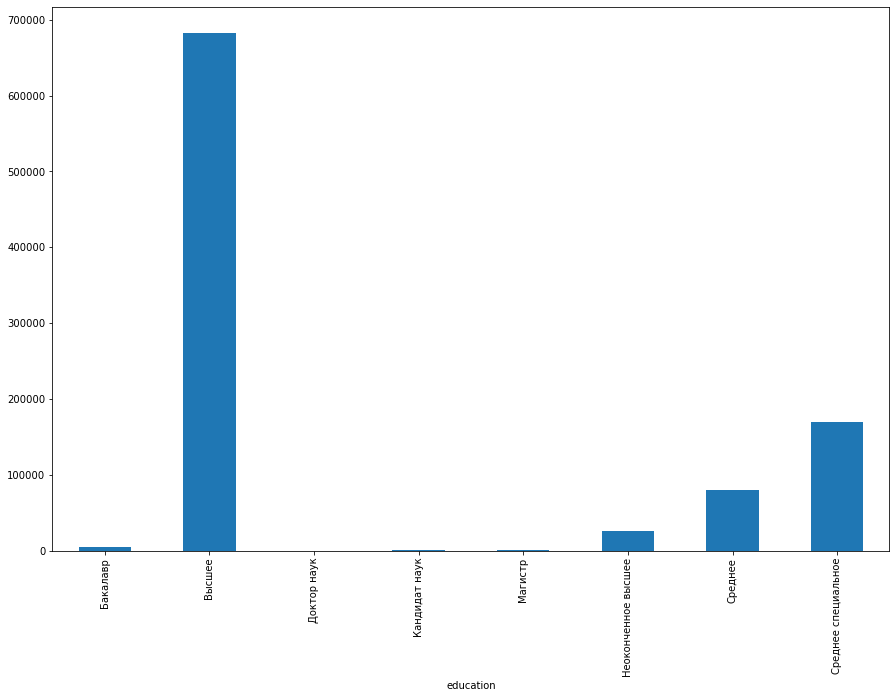

In [15]:
df.groupby('education').size().plot(figsize=(15,10), kind='bar')

In [16]:
df.loc[df.age > 70, 'age'] = df.loc[df.age > 70, 'age'] - 20
while df.loc[df.age<18, 'age'].shape[0] !=0:
    df.loc[df.age<18, 'age'] = df.loc[df.age<18, 'age'].apply(lambda x: [round(random.normalvariate(23, 4.5))
                                   ,round(random.normalvariate(40, 6.5))][np.random.binomial(1, 0.5)])

<AxesSubplot:xlabel='age'>

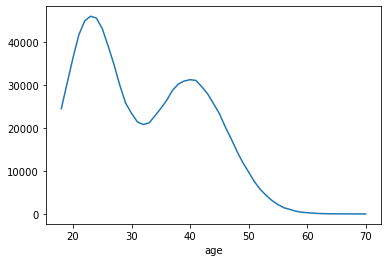

In [17]:
df.groupby('age').size().plot()

In [18]:
df = df.reset_index().rename(columns={'index':'app_id'})

In [19]:
df['reg'] = [[round(random.normalvariate(41, 4))
                               ,round(random.normalvariate(58, 6.5))][np.random.binomial(1, 0.45)]
                           for x in range(963811)]

df.loc[df.reg<0, 'reg'] = df.loc[df.reg<0, 'reg'] * -1

df.loc[df.reg>len(region_list)-1, 'reg'] = df.loc[df.reg>len(region_list)-1, 'reg'] % len(region_list)-1

<AxesSubplot:xlabel='reg'>

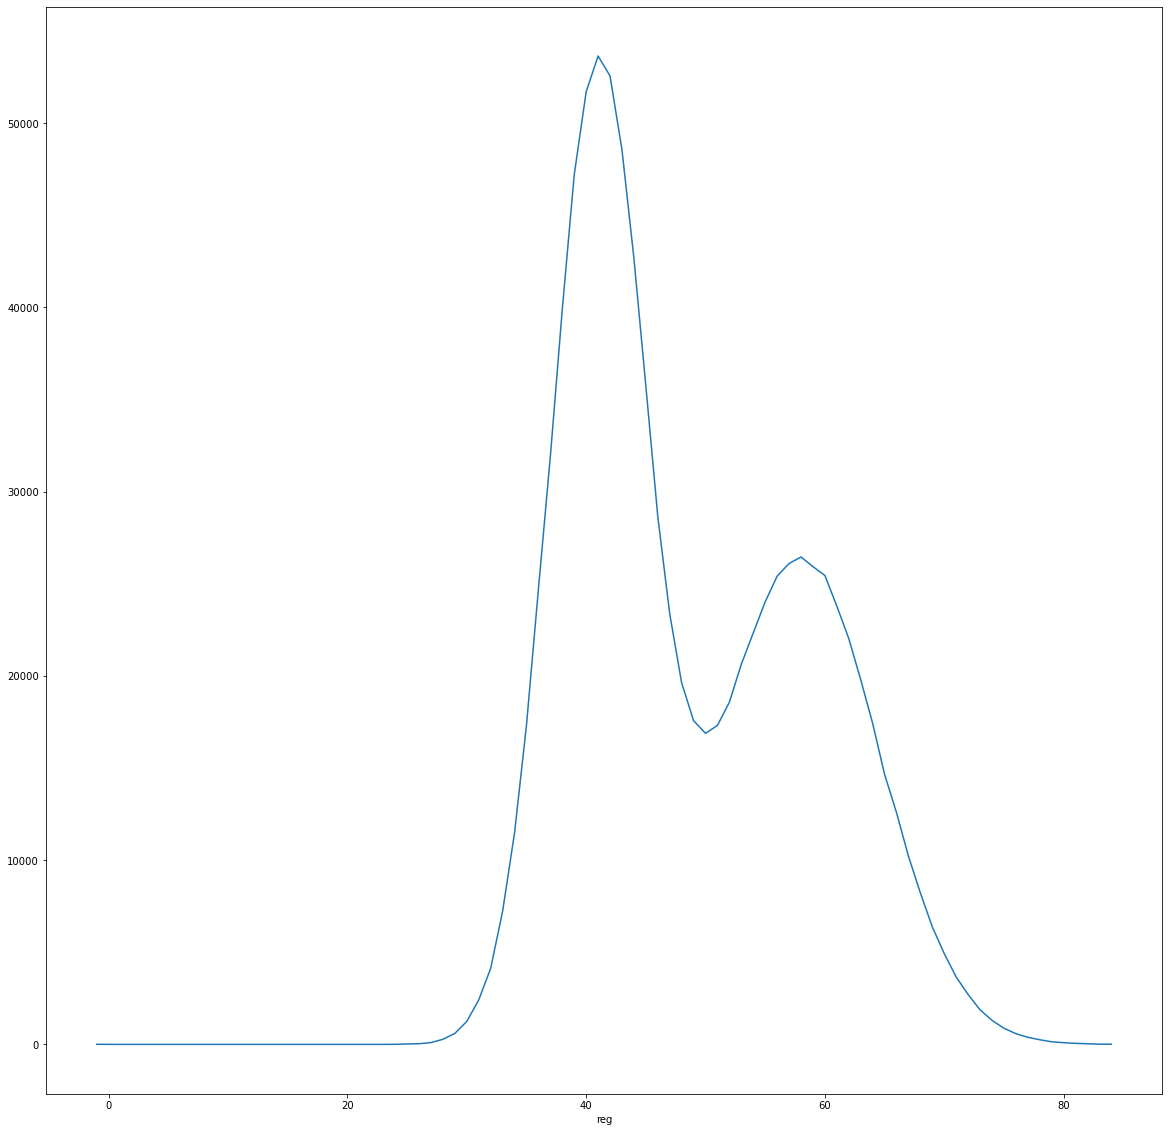

In [20]:
df.groupby('reg').size().plot(kind='line', figsize=(20,20))

In [21]:
df['region'] = df.reg.apply(lambda x: region_list[x][0])
df['city'] = df.reg.apply(lambda x: region_list[x][1])

df = df.drop('reg',1)

In [22]:
df.dtypes

app_id           int64
surname         object
name            object
fathername      object
sex             object
age              int64
is_married       int64
has_children     int64
education       object
region          object
city            object
dtype: object

# Inspect missing regions

In [23]:
# import geojson

# with open('./russia.geojson.txt', encoding='utf8') as f:
#     gj = geojson.load(f)

# json_reg_list= [gj['features'][x]['properties']['name'] for x in range(len(gj['features'])-1)]

# intersection = [x for x in json_reg_list if x in [y[0] for y in region_list]]

#  [x for x in json_reg_list if x not in [y[0] for y in region_list]]

# [y[0] for y in region_list if y[0] not in intersection]

# set([x for x in df.region.to_list() if x not in json_reg_list])

# Load to DWH

In [35]:
conn = psycopg2.connect(dbname='kr_bruklin', user='postgres', 
                        password='admin', host='localhost', port=5432)

with conn.cursor() as curs:
    curs.execute('''
drop table if exists raw_data.client_data cascade;
create table raw_data.client_data
    (app_id int,
    surname varchar(100),
    name varchar(100),
    fathername varchar(100),
    sex varchar(10),
    age int,
    region varchar(100),
    city varchar(100),
    is_married bit,
    has_children bit,
    education varchar(50),
    loading_dt timestamp default now());''')
conn.commit()
conn.close()

In [32]:
df = df[['app_id', 'surname', 'name', 'fathername', 'sex', 'age', 'region', 'city', 'is_married',
       'has_children', 'education']]

In [33]:
df.columns

Index(['app_id', 'surname', 'name', 'fathername', 'sex', 'age', 'region',
       'city', 'is_married', 'has_children', 'education'],
      dtype='object')

In [36]:
for i in tqdm(range(1, df.shape[0] // 1000 +2)):
    tmp = df.iloc[(i-1)*1000:i*1000].copy()
    if tmp.shape[0] > 0:
        for col in ['surname', 'name', 'fathername', 'sex', 'region', 'city','education','is_married', 'has_children']:
            tmp[col] = tmp[col].apply(lambda x: f"'{x}'")
        tmp['result'] = tmp.apply(lambda x: '('+','.join([str(x[c]) for c in tmp.columns])+',DEFAULT)', axis=1)
        values = ','.join(tmp.result.to_list())
        conn = psycopg2.connect(dbname='kr_bruklin', user='postgres', 
                        password='admin', host='localhost', port=5432)
        with conn.cursor() as curs:
            curs.execute(f'''insert into raw_data.client_data values
                            {values}''')
            curs.execute(f"insert into raw_data.log values ('insert', DEFAULT, 'raw_data.client_data', '', {tmp.shape[0]})")
        conn.commit()    
        conn.close()